<a href="https://colab.research.google.com/github/hamimelon9322/bishe/blob/main/plane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 关于航空订座系统数据分析

## 导包

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题

## 导入数据

In [ ]:
# data为全部数据
data = pd.read_csv('./drive/MyDrive/hami/1021.csv', encoding='gbk')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pax_name,pax_passport,seg_route_from,seg_route_to,seg_flight,seg_cabin,seg_dep_time,pax_fcny,pax_tax,emd_lable,emd_lable2,gender,age,birth_date,residence_country,nation_name,city_name,province_name,marital_stat,ffp_nbr,member_level,often_city,enroll_chnl,cabin_hf_cnt_m3,cabin_hf_cnt_m6,cabin_hf_cnt_y1,cabin_hf_cnt_y2,cabin_hf_cnt_y3,cabin_f_cnt_m3,cabin_f_cnt_m6,cabin_f_cnt_y1,cabin_f_cnt_y2,cabin_f_cnt_y3,cabin_hy_cnt_m3,cabin_hy_cnt_m6,cabin_hy_cnt_y1,cabin_hy_cnt_y2,cabin_hy_cnt_y3,cabin_y_cnt_m3,cabin_y_cnt_m6,...,pit_avg_interval_m3,pit_avg_interval_m6,pit_avg_interval_y1,pit_avg_interval_y2,pit_avg_interval_y3,pit_ech_avg_amt_m3,pit_ech_avg_amt_m6,pit_ech_avg_amt_y1,pit_ech_avg_amt_y2,pit_ech_avg_amt_y3,pit_out_avg_amt_m3,pit_out_avg_amt_m6,pit_out_avg_amt_y1,pit_out_avg_amt_y2,pit_out_avg_amt_y3,pit_income_cnt_m3,pit_income_cnt_m6,pit_income_cnt_y1,pit_income_cnt_y2,pit_income_cnt_y3,pit_pay_cnt_m3,pit_pay_cnt_m6,pit_pay_cnt_y1,pit_pay_cnt_y2,pit_pay_cnt_y3,pit_income_avg_amt_m3,pit_income_avg_amt_m6,pit_income_avg_amt_y1,pit_income_avg_amt_y2,pit_income_avg_amt_y3,pit_pay_avg_amt_m3,pit_pay_avg_amt_m6,pit_pay_avg_amt_y1,pit_pay_avg_amt_y2,pit_pay_avg_amt_y3,pit_add_chnl_m3,pit_add_chnl_m6,pit_add_chnl_y1,pit_add_chnl_y2,pit_add_chnl_y3
0,9612c51f08718e48b1361e415ef55be9,93d0aceeaef3f85264e5c5b5b1148a90,PVG,JFK,AB1006,J,2018/12/16 20:00,4161.0,584.43,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,c7ca533cd9da4c4bf3d597248f90bc6e,6930f6fa59d86c11fa28c610ab6f56a5,PVG,JFK,AB1006,J,2019/2/18 20:00,1670.0,248.80,1,0,0,0,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,bd2cb6b0dd56fb3de6f7c018296a07e2,da73afa8f6ededd29d67a9331dccdbe9,PVG,LAX,AB1009,Y,2018/3/9 13:20,243.0,301.31,1,0,0,0,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,65657872fe131ea7651565638dcb5683,dc31eead23771810dbb586ad236ade3b,PVG,LAX,AB1009,Y,2018/1/2 13:20,1362.0,454.16,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,722261f7b860b183da9fe0b6630b6dbf,7689603247539830a08d945cb1a57823,PVG,JFK,AB1010,Y,2018/7/6 11:30,675.0,284.11,1,1,M,0,0,中国,0,0,0,0,6.230000e+11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0


## 清洗数据，将无效值转换为NaN

In [ ]:
# data_pay 为付费选座数据
data_pay = pd.DataFrame.copy(data, deep=True)
data_pay['emd_lable2'].replace([0,'0'], np.nan, inplace=True)
data_pay.drop(data_pay[np.isnan(data_pay['emd_lable2'])].index, inplace=True)
data_pay.head()

,pax_name,pax_passport,seg_route_from,seg_route_to,seg_flight,seg_cabin,seg_dep_time,pax_fcny,pax_tax,emd_lable,...,pit_pay_avg_amt_m3,pit_pay_avg_amt_m6,pit_pay_avg_amt_y1,pit_pay_avg_amt_y2,pit_pay_avg_amt_y3,pit_add_chnl_m3,pit_add_chnl_m6,pit_add_chnl_y1,pit_add_chnl_y2,pit_add_chnl_y3
4,722261f7b860b183da9fe0b6630b6dbf,7689603247539830a08d945cb1a57823,PVG,JFK,AB1010,Y,2018/7/6 11:30,675.0,284.11,1,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
7,2cd73d0759be784227b6294ad11a2ae3,6da54673b857648cf5408d7688c7cdee,PVG,JFK,AB1006,Y,2017/7/7 19:10,1222.0,453.66,1,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
22,950cac54b76a205ecafa4d036a7bf52e,51fbae00e74e637b422e7e18b74828af,PVG,JFK,AB1006,Y,2018/8/28 20:30,0.0,450.91,1,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
52,6588aef02eae46eae248deb9ca29c862,8fafa5f86fd24ed99a7c1514a04c6ec5,PVG,JFK,AB1006,Y,2018/5/12 19:10,704.0,243.51,1,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
71,ff03ed4607fa32b53830908764f71ad5,caf34ef59b31ac909095b568ca3a7f7e,PVG,JFK,AB1006,Y,2018/10/3 20:30,570.0,278.11,1,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0


## 总体情况

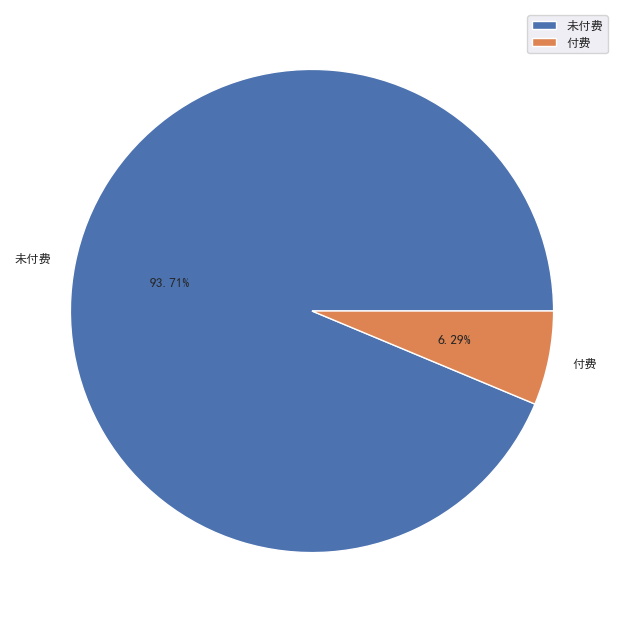

In [ ]:
# 展示总体情况的饼图
plt.figure(figsize=(20, 8), dpi=100)
patches, texts, autotexts = plt.pie([data.shape[0]-data_pay.shape[0], data_pay.shape[0]], labels=['未付费', '付费'], autopct = '%3.2f%%')
plt.legend(patches, ['未付费', '付费'], loc='best')

## 不同定居国家付费选座的情况

In [ ]:
# 生成不同定居国家乘坐航班的情况
residence_country_all = data.groupby('residence_country').count()['emd_lable2']

# 生成不同定居国家乘坐航班付费选座的情况
residence_country_pay = data.groupby('residence_country')['emd_lable2'].apply(np.sum, axis=0)

# 生成付费和全部的对照表
residence_country_map = pd.DataFrame({'全部': [i for i in residence_country_all], '付费': [i for i in residence_country_pay]})
residence_country_map.index = residence_country_all.index
residence_country_map

,全部,付费
residence_country,,
0,19023,1128
中国,4290,337
中国台湾,5,0
乌克兰,1,0
印度,2,0
意大利,1,0
新加坡,4,0
日本,5,0
法国,1,0


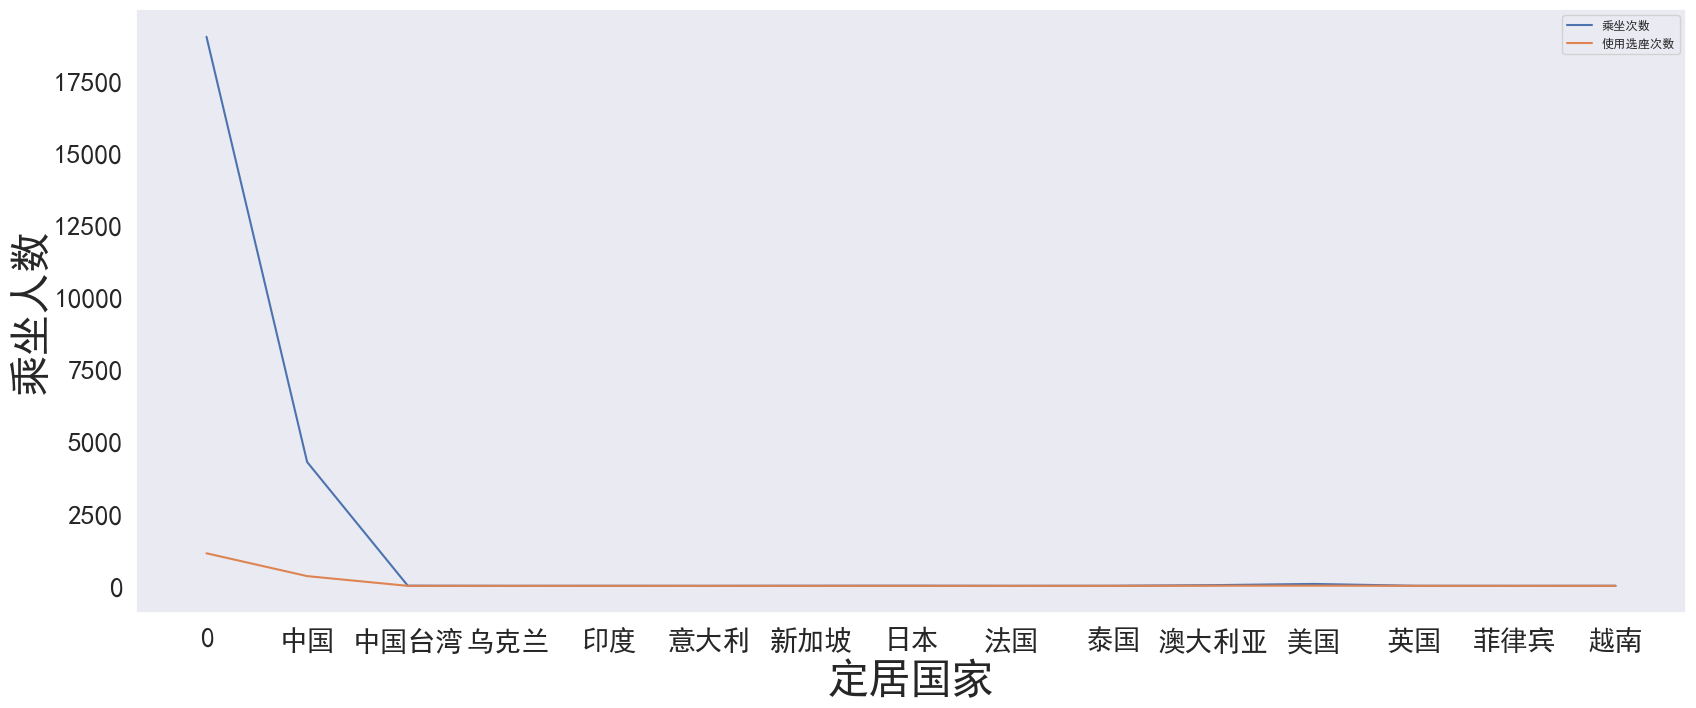

In [ ]:
# 绘制折线图
plt.figure(figsize=(20, 8), dpi=100)
sns.lineplot(x=residence_country_map.index, y='全部', label='乘坐次数', data=residence_country_map)
sns.lineplot(x=residence_country_map.index, y='付费', label='使用选座次数', data=residence_country_map)
plt.xlabel('定居国家', fontsize=30)
plt.ylabel('乘坐人数', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.legend(loc='best')
plt.show()

## 不同航班付费选座的情况

In [ ]:
# 生成不同航班乘坐的总人数情况
seg_flight_all = data.groupby('seg_flight')['emd_lable2'].count()

# 生成不同航班使用的付费选座的情况
seg_flight_pay = data.groupby('seg_flight')['emd_lable2'].apply(np.sum, axis=0)

# 构成表
seg_flight_map = pd.DataFrame({'全部': [i for i in seg_flight_all], '付费': [i for i in seg_flight_pay]})
seg_flight_map.index = seg_flight_all.index
seg_flight_map

,全部,付费
seg_flight,,
AB1000,5,0
AB1001,1,1
AB1002,1,0
AB1003,1,0
AB1004,1,0
AB1005,14,0
AB1006,4568,373
AB1007,4902,196
AB1008,4228,277


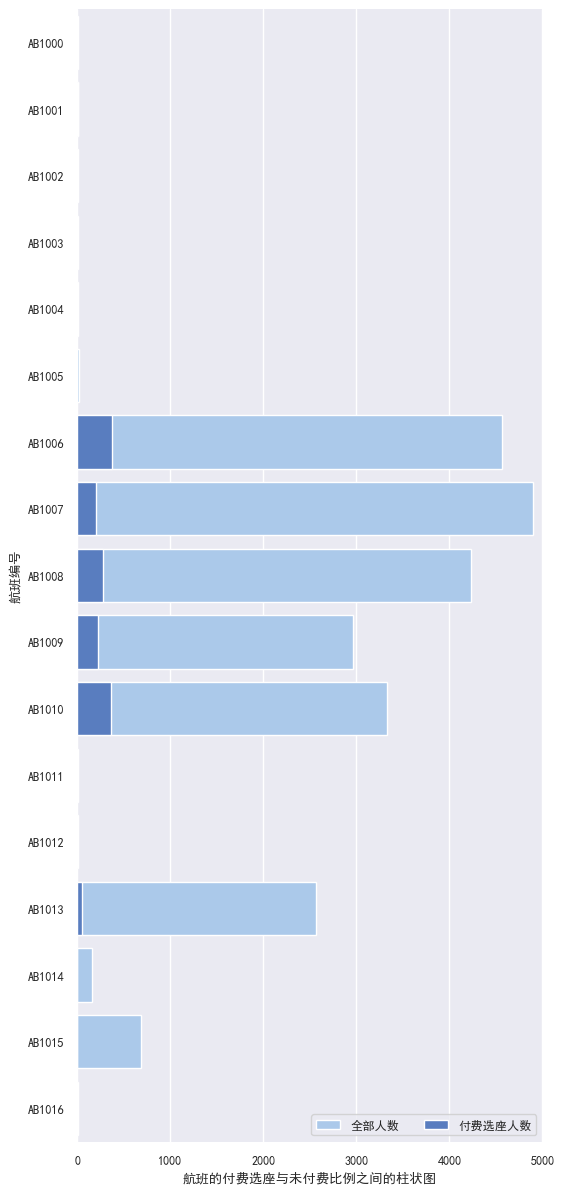

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15), dpi=100)

# 绘制全部的情况
sns.set_color_codes("pastel")
sns.barplot(x='全部', y=seg_flight_map.index, data=seg_flight_map, color="b", label='全部人数')

# 绘制付费的情况
sns.set_color_codes("muted")
sns.barplot(x='付费', y=seg_flight_map.index, data=seg_flight_map, color="b", label='付费选座人数')

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5000), ylabel="航班编号",
       xlabel="航班的付费选座与未付费比例之间的柱状图")
sns.despine(left=True, bottom=True)

plt.show()

## 不同舱位付费选座的情况

In [ ]:
# 选择不同舱位的总人数
seg_cabin_all = data.groupby('seg_cabin')['emd_lable2'].count()

# 选择不同舱位付费选座的情况
seg_cabin_pay = data.groupby('seg_cabin')['emd_lable2'].apply(np.sum, axis=0)

# 制作表格
seg_cabin_map = pd.DataFrame({'全部': [i for i in seg_cabin_all], '付费': [i for i in seg_cabin_pay]})
seg_cabin_map.index = seg_cabin_all.index
seg_cabin_map

,全部,付费
seg_cabin,,
C,4,0
F,12,0
J,2962,1
W,90,0
Y,20363,1474


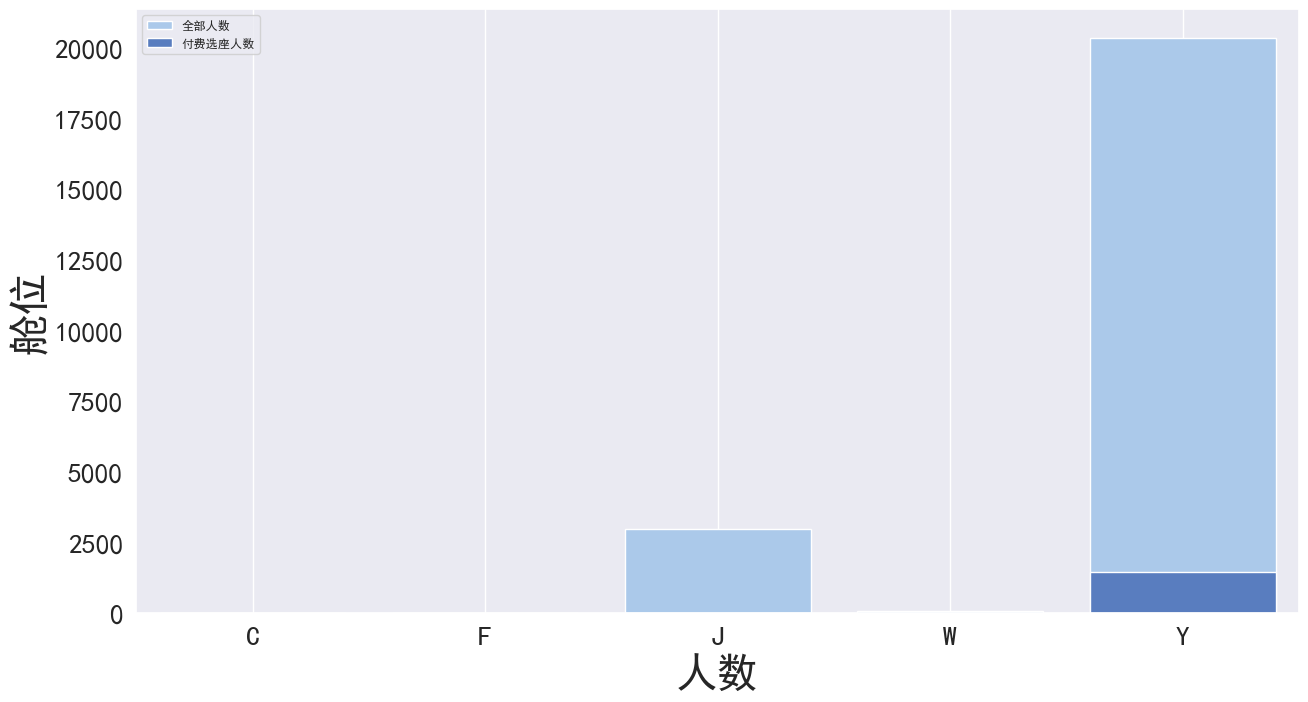

In [ ]:
# 绘制柱状体
f, ax = plt.subplots(figsize=(15, 8), dpi=100)
sns.set_color_codes("pastel")
sns.barplot(data=seg_cabin_map, x=seg_cabin_map.index, y='全部', color='b', label='全部人数')
sns.set_color_codes("muted")
sns.barplot(data=seg_cabin_map, x=seg_cabin_map.index, y='付费', color='b', label='付费选座人数')
plt.legend(loc='best')
plt.xlabel('人数', fontsize=30)
plt.ylabel('舱位', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()

plt.show()

## 不同机票费的选座情况

In [ ]:
# 进行离散化

###### 数据配置区 ######

Precision = 100      # 确定精度，精度不要太小，计算机跑不动

######################

pax_fcny = data['pax_fcny']
gap = [i for i in range(0, int(pax_fcny.max()+1), Precision)]

pax_fcny_cut = pd.cut(pax_fcny, gap)

# 对分组进行计数
pax_fcny_cut = pd.value_counts(pax_fcny_cut)

# 对索引进行排序
pax_fcny_cut = pax_fcny_cut.sort_index()
pax_fcny_cut_show = pd.DataFrame({'区间': [i for i in pax_fcny_cut.index], '数量': [i for i in pax_fcny_cut]})
pax_fcny_cut_show

,区间,数量
0,"(0, 100]",262
1,"(100, 200]",2230
2,"(200, 300]",3053
3,"(300, 400]",2297
4,"(400, 500]",2499
...,...,...
42638,"(4263800, 4263900]",0
42639,"(4263900, 4264000]",0
42640,"(4264000, 4264100]",0
42641,"(4264100, 4264200]",0


In [ ]:
pax_fcny_pay = data_pay['pax_fcny']

pax_fcny_pay_cut = pd.cut(pax_fcny_pay, gap)

# 对分组进行计数
pax_fcny_pay_cut = pd.value_counts(pax_fcny_pay_cut)

# 对索引进行排序
pax_fcny_pay_cut = pax_fcny_pay_cut.sort_index()
pax_fcny_pay_cut_show = pd.DataFrame({'区间': [i for i in pax_fcny_pay_cut.index], '数量': [i for i in pax_fcny_pay_cut]})
pax_fcny_pay_cut_show

,区间,数量
0,"(0, 100]",0
1,"(100, 200]",138
2,"(200, 300]",169
3,"(300, 400]",166
4,"(400, 500]",160
...,...,...
42638,"(4263800, 4263900]",0
42639,"(4263900, 4264000]",0
42640,"(4264000, 4264100]",0
42641,"(4264100, 4264200]",0


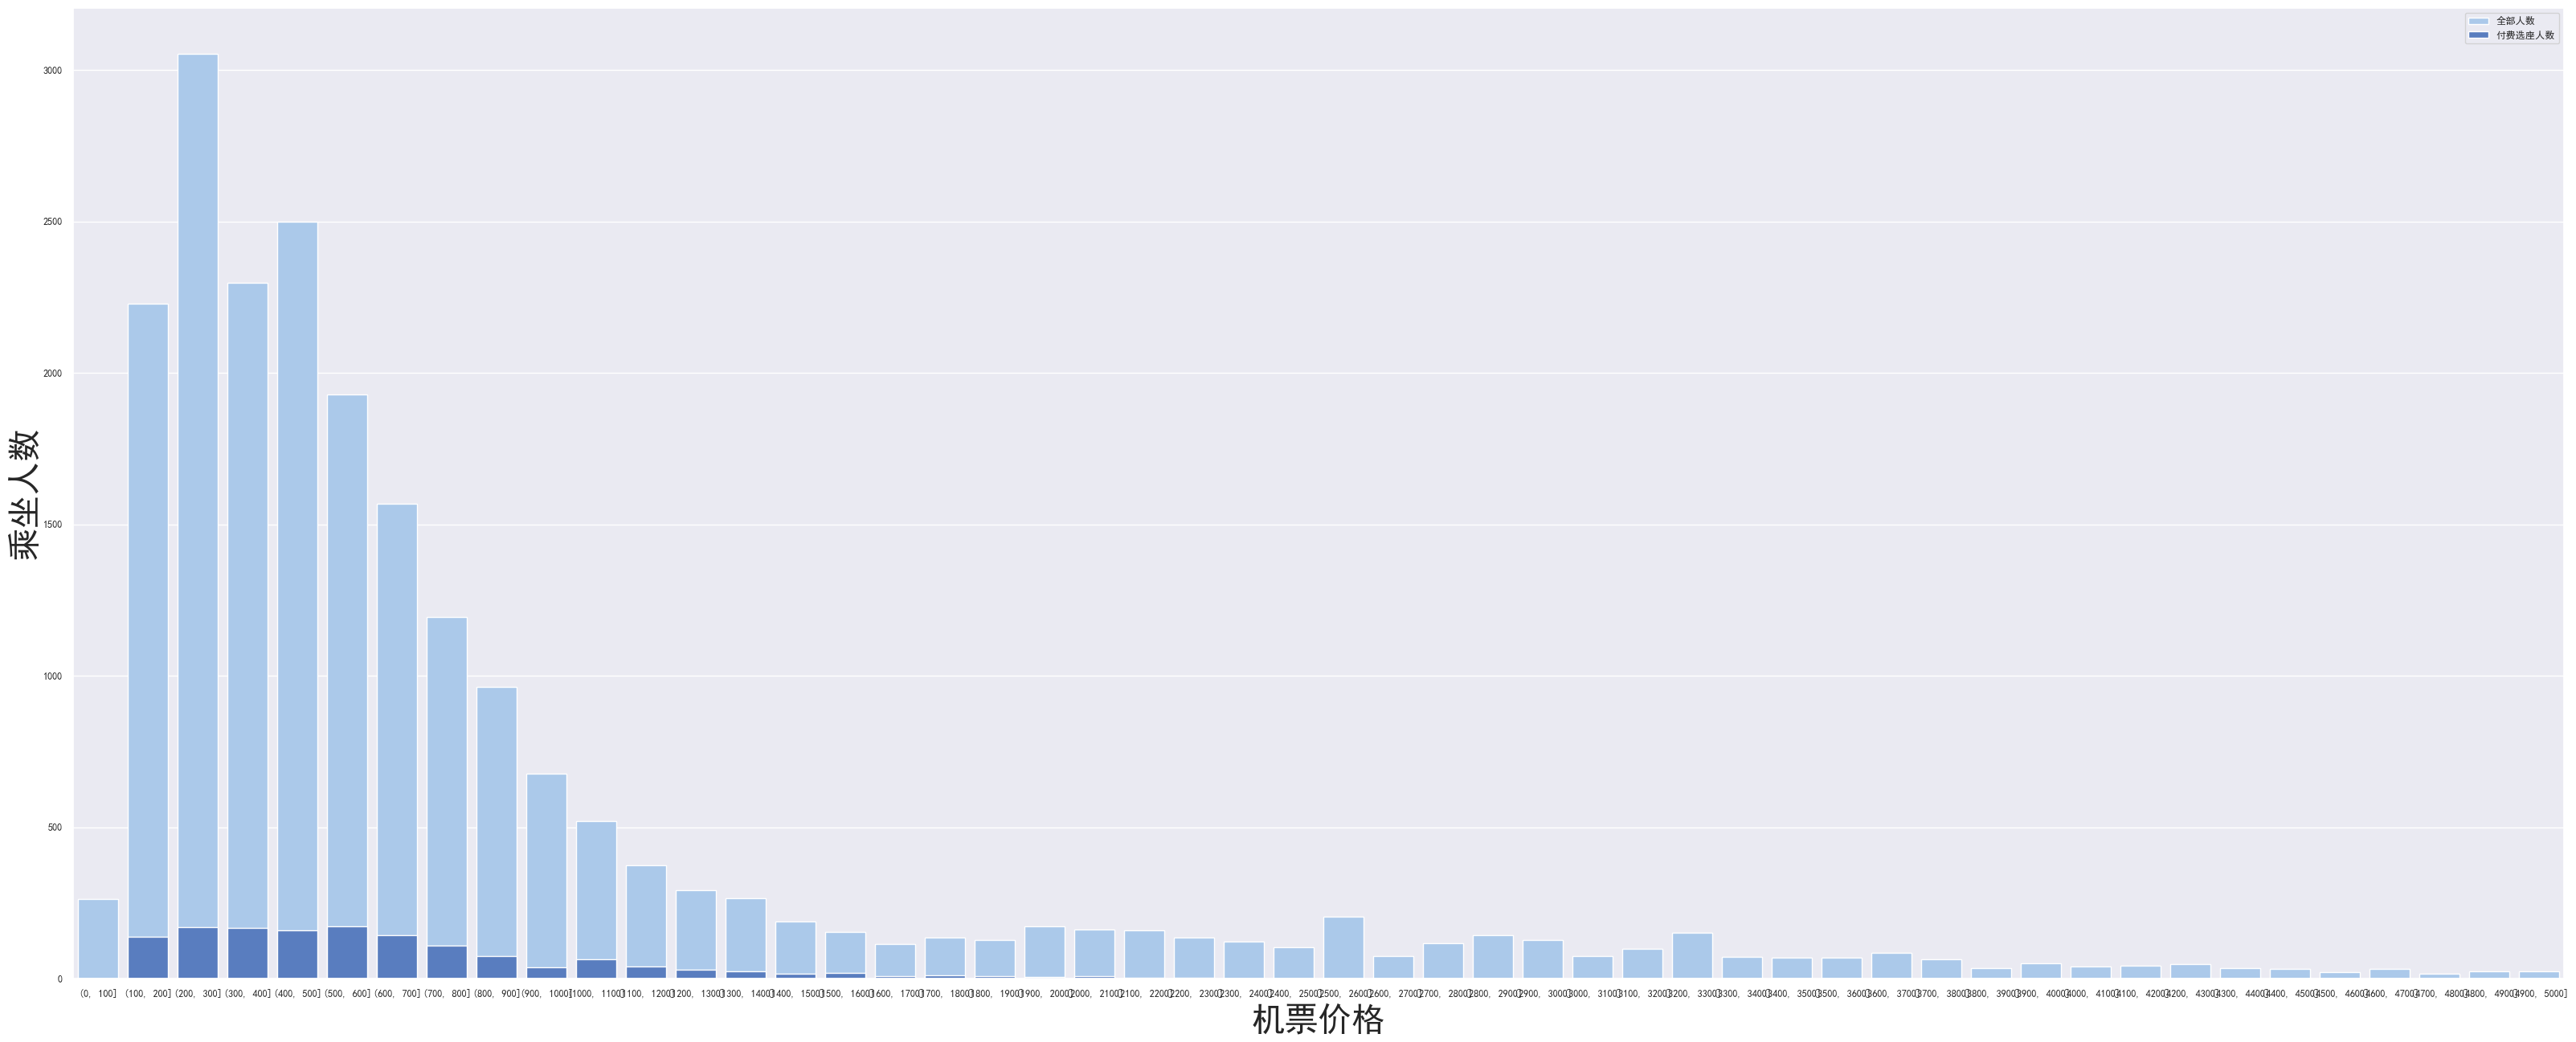

In [ ]:
###### 数据配置区 ######

# 选择区间
start_point = 0
end_point = 50

######################

pax_fcny_cut_show = pax_fcny_cut_show[start_point:end_point]
pax_fcny_pay_cut_show = pax_fcny_pay_cut_show[start_point:end_point]

plt.figure(figsize=(40, 16), dpi=100)
sns.set_color_codes("pastel")
sns.barplot(data=pax_fcny_cut_show, x='区间', y='数量', label='全部人数', color='b')
sns.set_color_codes("muted")
sns.barplot(data=pax_fcny_pay_cut_show, x='区间', y='数量', label='付费选座人数', color='b')
plt.xlabel('机票价格', fontsize=30)
plt.ylabel('乘坐人数', fontsize=30)
plt.legend(loc='best')
plt.show()

## 不同机票税费的选座情况

In [ ]:
# 进行离散化

###### 数据配置区 ######

Precision = 10      # 确定精度，精度不要太小，计算机跑不动

######################

# 全部
pax_tax = data['pax_tax']
gap = [i for i in range(0, int(pax_tax.max()+1), Precision)]

pax_tax_cut = pd.cut(pax_tax, gap)
pax_tax_cut = pd.value_counts(pax_tax_cut)
pax_tax_cut = pax_tax_cut.sort_index()
pax_tax_cut_show = pd.DataFrame({'区间': [i for i in pax_tax_cut.index], '数量': [i for i in pax_tax_cut]})
pax_tax_cut_show

,区间,数量
0,"(0, 10]",18
1,"(10, 20]",9
2,"(20, 30]",0
3,"(30, 40]",9
4,"(40, 50]",1
...,...,...
63665,"(636650, 636660]",0
63666,"(636660, 636670]",0
63667,"(636670, 636680]",0
63668,"(636680, 636690]",0


In [ ]:
# 付费选座
pax_tax_pay = data_pay['pax_tax']
pax_tax_pay_cut = pd.cut(pax_tax_pay, gap)
pax_tax_pay_cut = pd.value_counts(pax_tax_pay_cut)
pax_tax_pay_cut = pax_tax_pay_cut.sort_index()
pax_tax_pay_cut_show = pd.DataFrame({'区间': [i for i in pax_tax_pay_cut.index], '数量': [i for i in pax_tax_pay_cut]})
pax_tax_pay_cut_show

,区间,数量
0,"(0, 10]",0
1,"(10, 20]",0
2,"(20, 30]",0
3,"(30, 40]",0
4,"(40, 50]",0
...,...,...
63665,"(636650, 636660]",0
63666,"(636660, 636670]",0
63667,"(636670, 636680]",0
63668,"(636680, 636690]",0


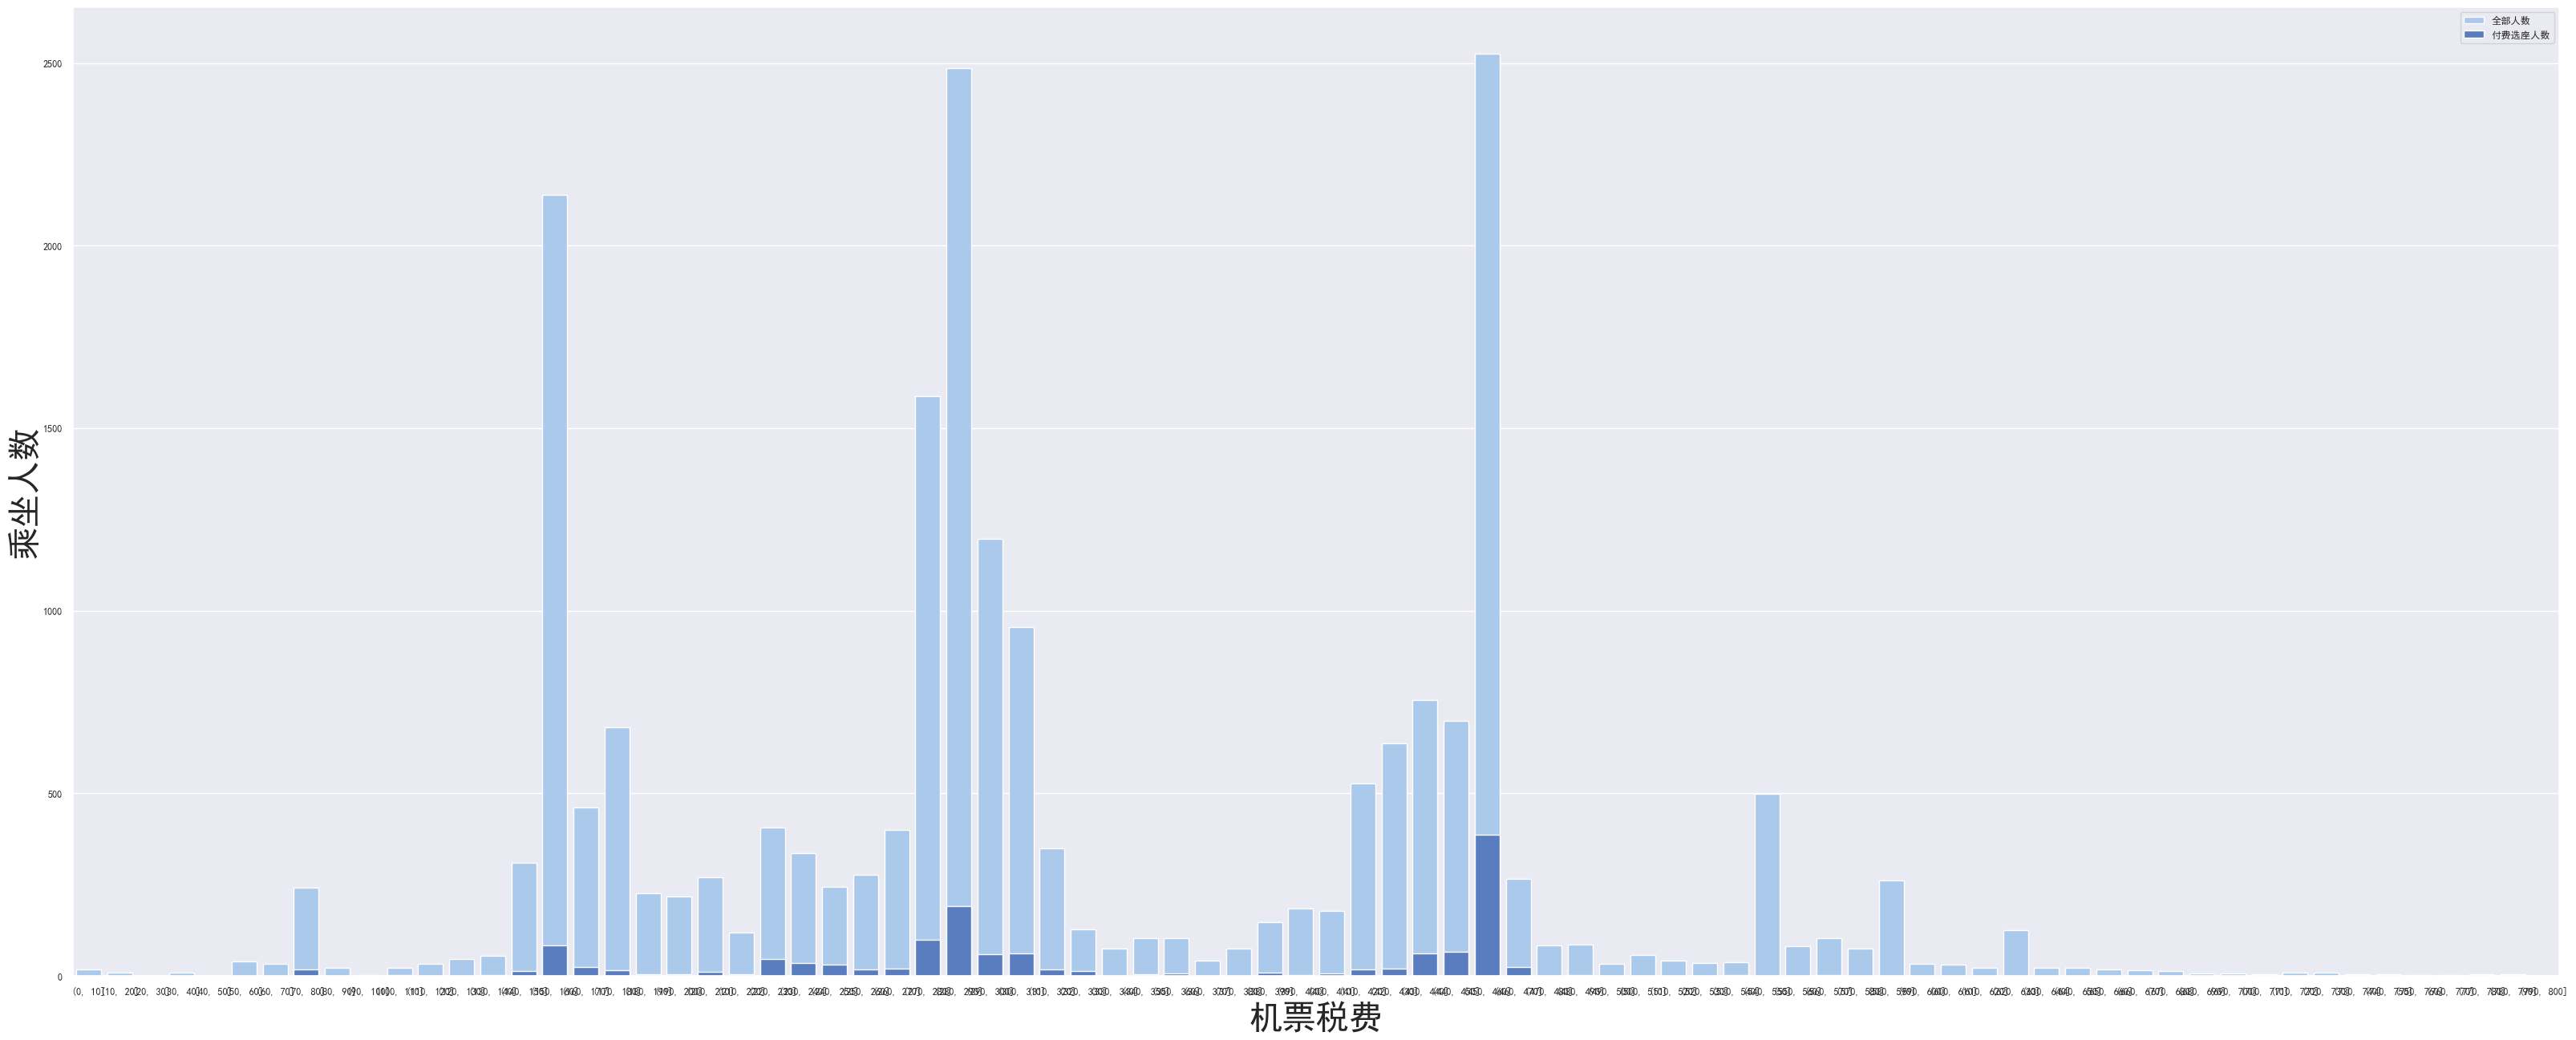

In [ ]:
###### 数据配置区 ######

# 选择区间
start_point = 0
end_point = 80

######################

# 进行分割
pax_tax_cut_show = pax_tax_cut_show[start_point:end_point]
pax_tax_pay_cut_show = pax_tax_pay_cut_show[start_point:end_point]

# 画图
plt.figure(figsize=(40, 16), dpi=100)
sns.set_color_codes("pastel")
sns.barplot(data=pax_tax_cut_show, x='区间', y='数量', label='全部人数', color='b')
sns.set_color_codes("muted")
sns.barplot(data=pax_tax_pay_cut_show, x='区间', y='数量', label='付费选座人数', color='b')
plt.xlabel('机票税费', fontsize=30)
plt.ylabel('乘坐人数', fontsize=30)
plt.legend(loc='best')
plt.show()

## 不同机票费对付费选座的比例

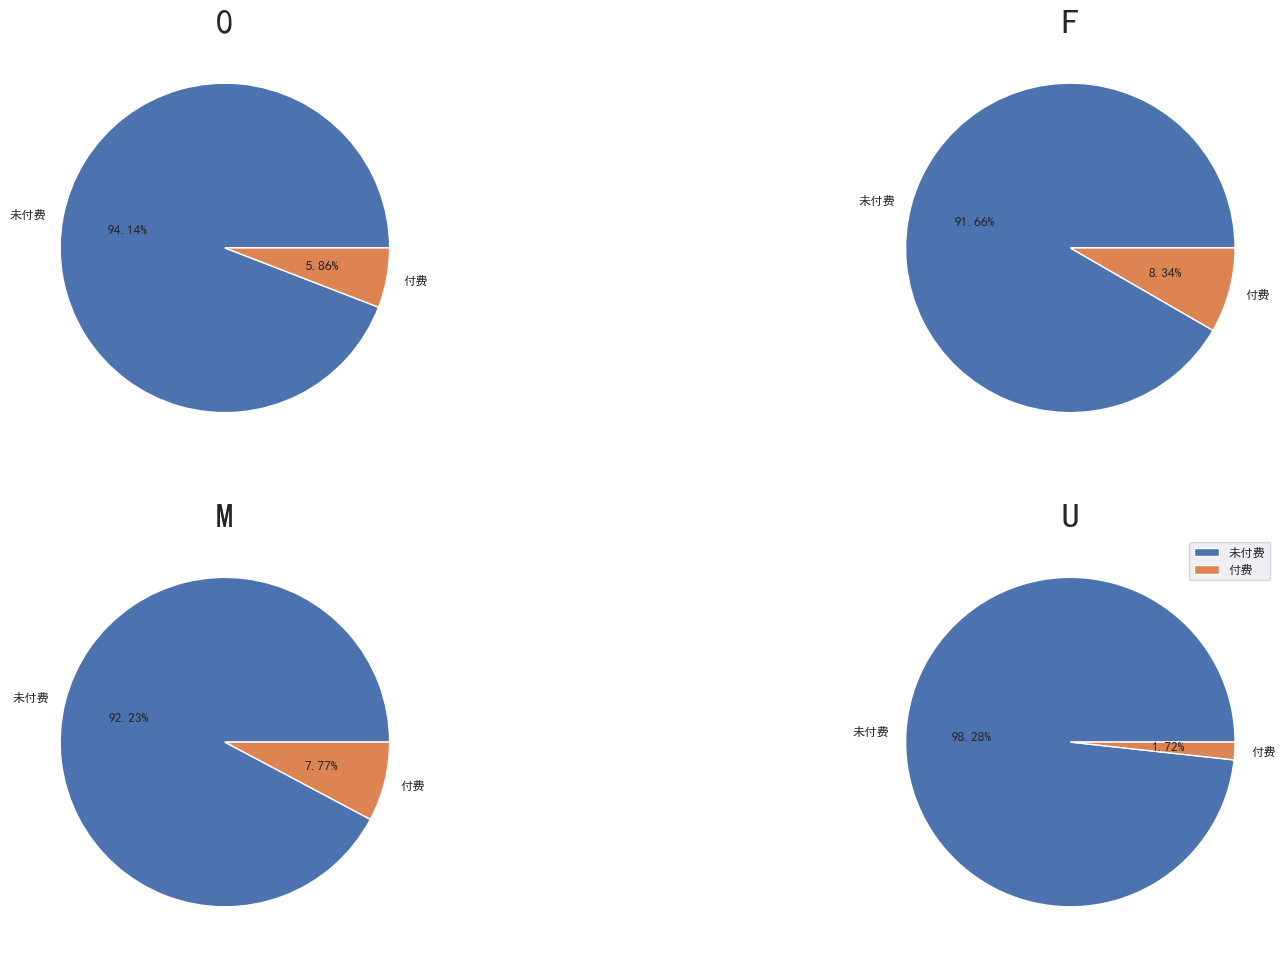

In [ ]:
# 总人数
gender_all = [i for i in data.groupby('gender').count()['emd_lable2']]

# 付费人数
gender_pay = [i for i in data_pay.groupby('gender').count()['emd_lable2']]

gender_index = [i for i in data.groupby('gender').count()['emd_lable2'].index]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), dpi=100)
fig.set_dpi(100)
patches, texts, autotexts = axes[0, 0].pie([gender_all[0] - gender_pay[0], gender_pay[0]], labels=['未付费', '付费'], autopct = '%3.2f%%')
axes[0, 0].set_title(gender_index[0], fontsize=25)
patches, texts, autotexts = axes[0, 1].pie([gender_all[1] - gender_pay[1], gender_pay[1]], labels=['未付费', '付费'], autopct = '%3.2f%%')
axes[0, 1].set_title(gender_index[1], fontsize=25)
patches, texts, autotexts = axes[1, 0].pie([gender_all[2] - gender_pay[2], gender_pay[2]], labels=['未付费', '付费'], autopct = '%3.2f%%')
axes[1, 0].set_title(gender_index[2], fontsize=25)
patches, texts, autotexts = axes[1, 1].pie([gender_all[3] - gender_pay[3], gender_pay[3]], labels=['未付费', '付费'], autopct = '%3.2f%%')
axes[1, 1].set_title(gender_index[3], fontsize=25)
plt.legend(patches, ['未付费', '付费'], loc='best')

## 婚姻状态对付费选做的影响

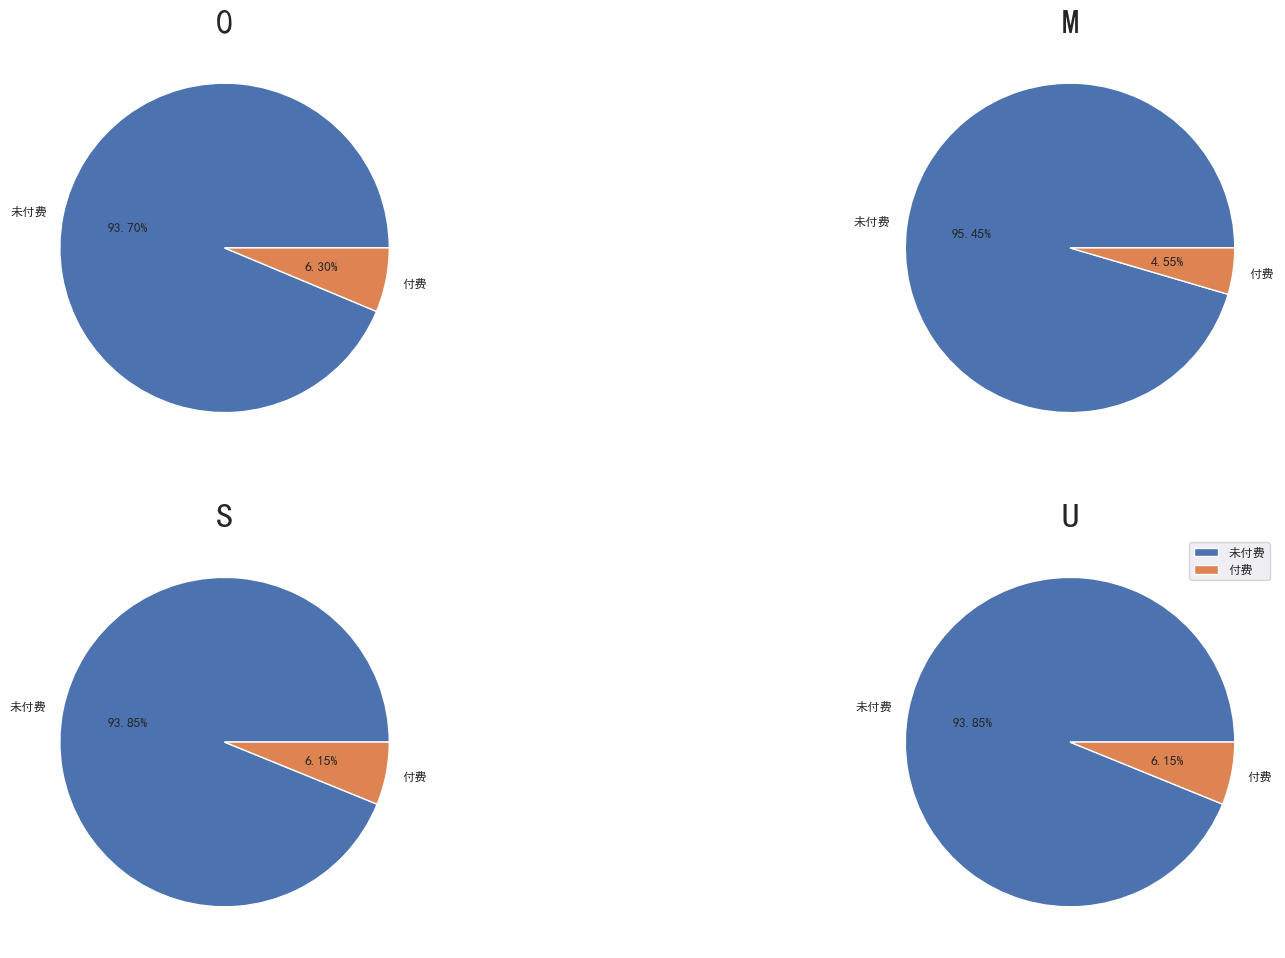

In [ ]:
# 全部人数
marital_stat_all = [i for i in data.groupby('marital_stat').count()['emd_lable2']]

# 付费人数
marital_stat_pay = [i for i in data_pay.groupby('marital_stat').count()['emd_lable2']]

marital_stat_index = [i for i in data.groupby('marital_stat').count()['emd_lable2'].index]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), dpi=100)
fig.set_dpi(100)
patches, texts, autotexts = axes[0, 0].pie([marital_stat_all[0] - marital_stat_pay[0], marital_stat_pay[0]], labels=['未付费', '付费'], autopct = '%3.2f%%')
axes[0, 0].set_title(marital_stat_index[0], fontsize=25)
patches, texts, autotexts = axes[0, 1].pie([marital_stat_all[1] - marital_stat_pay[1], marital_stat_pay[1]], labels=['未付费', '付费'], autopct = '%3.2f%%')
axes[0, 1].set_title(marital_stat_index[1], fontsize=25)
patches, texts, autotexts = axes[1, 0].pie([marital_stat_all[2] - marital_stat_pay[2], marital_stat_pay[2]], labels=['未付费', '付费'], autopct = '%3.2f%%')
axes[1, 0].set_title(marital_stat_index[2], fontsize=25)
patches, texts, autotexts = axes[1, 1].pie([marital_stat_all[3] - marital_stat_pay[3], marital_stat_pay[3]], labels=['未付费', '付费'], autopct = '%3.2f%%')
axes[1, 1].set_title(marital_stat_index[3], fontsize=25)
plt.legend(patches, ['未付费', '付费'], loc='best')

## 不同国籍对付费选做的影响

In [ ]:
# 全部人数
nation_name_all = [i for i in data.groupby('nation_name').count()['emd_lable2']]

# 付费人数
nation_name_pay = [i for i in data_pay.groupby('nation_name').count()['emd_lable2']]

# 合并两个数据
temp1 = data.groupby('nation_name').count()['emd_lable2']
temp2 = data_pay.groupby('nation_name').count()['emd_lable2']
nation_name_pay = pd.merge(temp1, temp2, right_index=True, left_index=True,how='outer')
# 将不存在的值替换成0
nation_name_pay.replace(np.nan, 0, inplace=True)
nation_name_pay.columns = ['全部', '付费']
nation_name_pay

,全部,付费
nation_name,,
0,19887,1217.0
中国,932,62.0
中国台湾,46,4.0
中国香港,21,0.0
亚美尼亚,1,0.0
以色列,1,0.0
俄罗斯,1,0.0
加拿大,15,0.0
南非,1,0.0


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

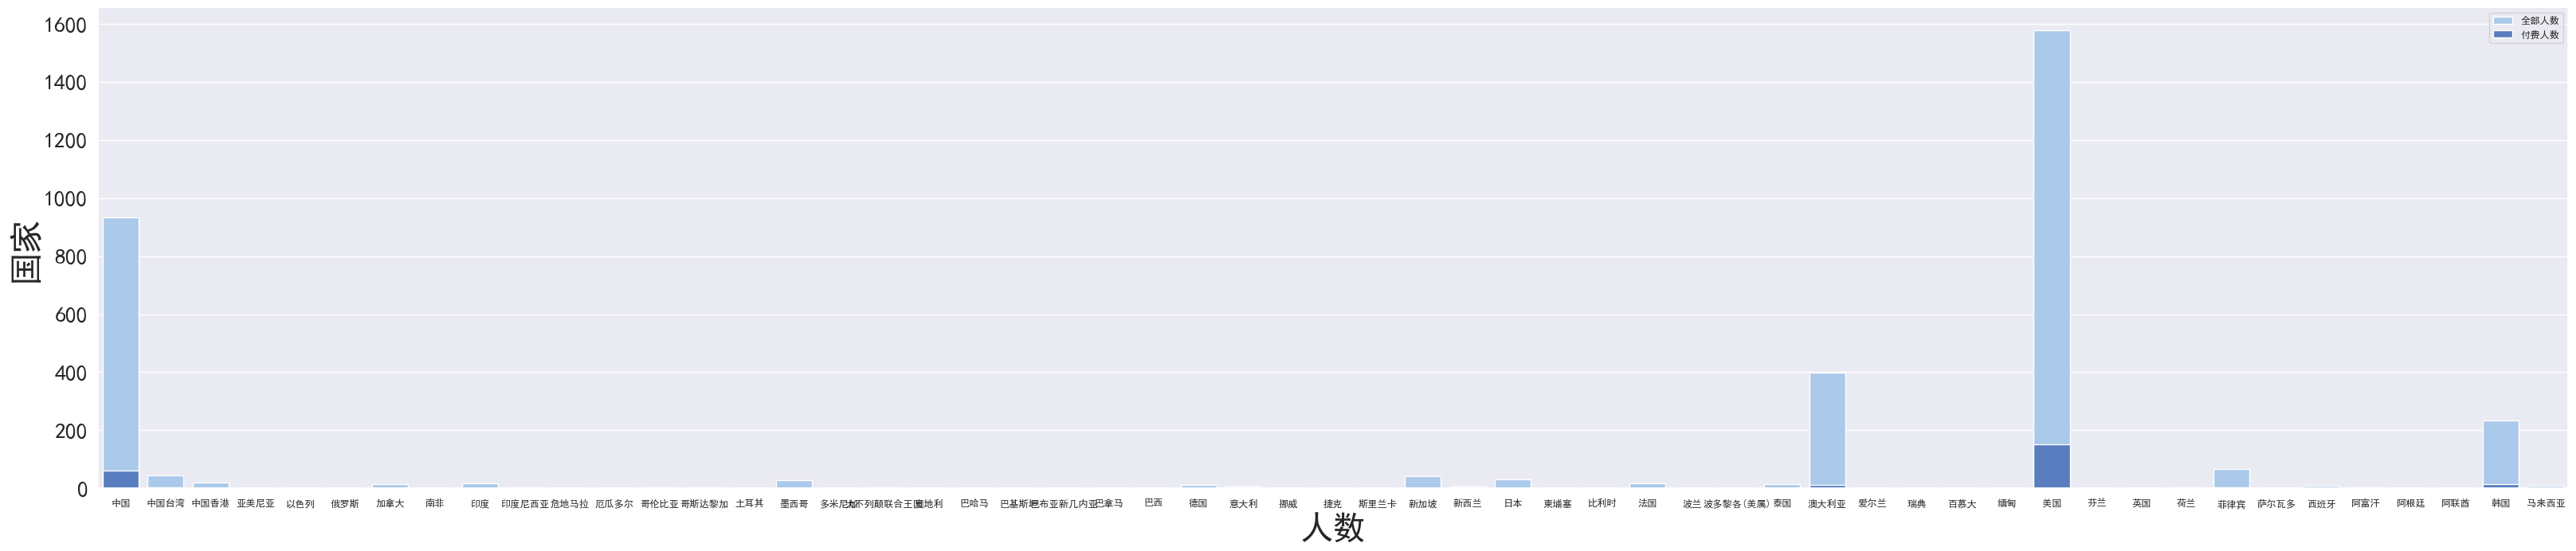

In [ ]:
###### 数据配置区 ######

is_show_0 = False      # 是否显示未知的国家，如果要显示的话，可能会导致图片比例不协调

######################

if is_show_0 is False:
    nation_name_pay_map = nation_name_pay.iloc[1:, :]

plt.figure(figsize=(40, 8), dpi=100)
sns.set_color_codes("pastel")
sns.barplot(data=nation_name_pay_map, x=nation_name_pay_map.index, y='全部', color='b', label='全部人数')
sns.set_color_codes("muted")
sns.barplot(data=nation_name_pay_map, x=nation_name_pay_map.index, y='付费', color='b', label='付费人数')
plt.legend(loc='best')
plt.xlabel('人数', fontsize=30)
plt.ylabel('国家', fontsize=30)
plt.yticks(fontsize=20)